# Ocean Waves

In this example we generate a 2D Jonswap spectrum from 
- spectral parameters: Hs, Tp, pdir
- with a Jonswap spectral shape: gamma
- and a directional spreading shape: ms

In [1]:
import oceanwaves as ow, swan
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#help(ow)

In [3]:
#help(swan)

# Parametric (0D)

In [4]:
# Define 0D spectrum, to generate 1D and 2D spectra
Sp0     = ow.Spec0()
Sp0.t     = datetime.datetime.strptime('19920516.130000','%Y%m%d.%H%M%S') # parse swan time notation
Sp0.Hs    = 1.
Sp0.Tp    = 10
Sp0.pdir  = 90 # from west (right) to east (left)
Sp0.ms    = 2

In [5]:
# save > load > plot again
with open(r'./testdata/Spec0D_scalar.tpar','w') as f:
    swan.to_file0D(Sp0,f)     
with open(r'./testdata/Spec0D_scalar.tpar','r') as f:
    Sp0_copy = swan.from_file0D(f)
Sp0_copy

<Spectrum0D  Hs=[ 1.] Tp=[ 10.] @ [datetime.datetime(1992, 5, 16, 13, 0)] : "">

## JONSWAP (1D)

$$ H_{m0} = p_m*\gamma^np.exp(-0.5*(T_p*f-1)^2./\sigma(f,1/T_p,s_a,s_b)^2);$$

In [6]:
help(ow.jonswap)

Help on function jonswap in module oceanwaves:

jonswap(f, Hm0, Tp, g=9.81, gamma=3.3, method='Yamaguchi', normalize=True, sa=0.07, sb=0.09)
    Generate 1D JONSWAP spectrum in [m2/Hz']
    E = ow.jonswap(f,Hm0,Tp,**kwargs)
    By default E is nornalized to the integral of E == Hm0.



In [7]:
Sp1 = ow.Spec1(np.linspace(0.03,.3,100),lon=[4],lat=[52],t=[datetime.datetime(2016,1,1)])
Sp1.from_jonswap(Sp0.Hs, Sp0.Tp, Sp0.pdir, Sp0.ms,gamma=2.5)

<Spectrum1D  shape:[nt:1,nx:1,nf:100]: "">

$$H_s = 4 * \int_f E(f) df ^{(1/2)} $$

In [8]:
# check against parametric values
print('Hm0:'     ,Sp0.Hs    ,' =?= ',Sp1.Hm0())
print('Tp :'     ,Sp0.Tp    ,' =?= ',Sp1.Tp())
print('Tm01/02 :',Sp1.Tm01(), Sp1.Tm02())
Sp1

Hm0: 1.0  =?=  [[ 1.]]
Tp : 10  =?=  9.90990990991
Tm01/02 : [[ 8.40416066]] [[ 8.04250936]]


<Spectrum1D  shape:[nt:1,nx:1,nf:100]: "">

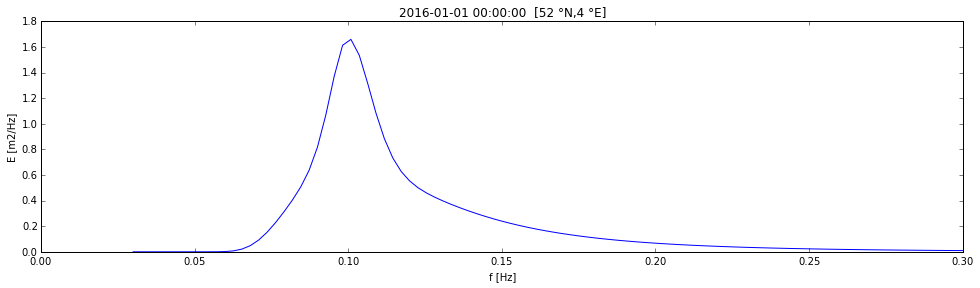

In [9]:
# use pyswan plot function
Sp1.plot('./testdata/Sp1.png') # directly to file, or to screen
%matplotlib inline 
fig=plt.figure()
fig.set_figwidth(16)
Sp1.plot()

## DIRECTIONAL SPREADING

$$(2^m_s) * (\gamma(m_s/2+1))^2 / (pi * \gamma(m_s+1))$$

In [10]:
help(ow.directional_spreading)

Help on function directional_spreading in module oceanwaves:

directional_spreading(dirs, pdir, ms, units='deg')
    Calculate directional spreading. 
    >> cdir = directional_spreading(dirs,pdir,ms,units='deg')
    where for example with pdir = 135
    >> dirs = np.asanyarray([0, 45, 60] + list(90+np.arange(0,19)*5.) +
    >>        [210,] + list(180+np.arange(1,5)*45.))



In [11]:
# define
units = 'deg'
dirs  = list(np.arange(-180,180)*1) # make sure to encompass pdir
cdir  = ow.directional_spreading(dirs,0,Sp0.ms,units)

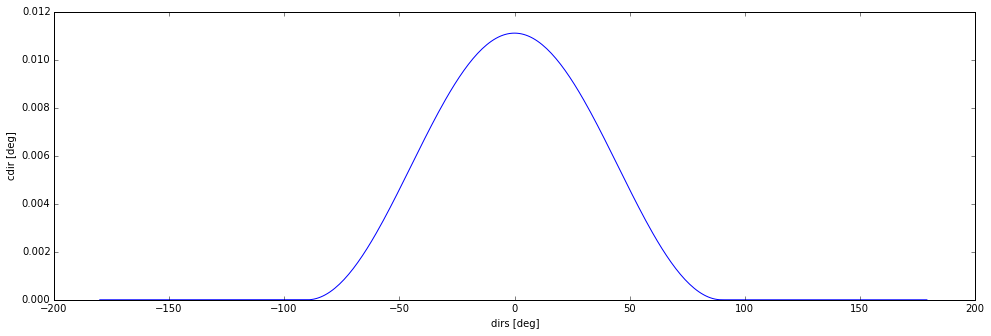

In [12]:
# plot
%matplotlib inline
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.plot(dirs,cdir)
ax.set_xlabel('dirs [deg]')
ax.set_ylabel('cdir [deg]')

## JONSWAP (2D)

In [13]:
Sp2 = ow.Spec2(direction=np.asarray(dirs),f=Sp1.f,lon=[4],lat=[52],t=[datetime.datetime(2016,1,1)])
Sp2.from_jonswap(Sp0.Hs, Sp0.Tp, Sp0.pdir, Sp0.ms)

<Spectrum2D  shape:[nt:1,nx:1,nf:100,nd:360]: "">

$$H_s = 4 * \int_\theta\int_f E(\theta,f) df d\theta ^{(1/2)} $$

In [14]:
# check against parametric values
print('Hm0:'  ,Sp0.Hs  ,' =?= ',Sp2.Hm0())
print('Tp :'  ,Sp0.Tp  ,' =?= ',Sp2.Tp())
print('pdir :',Sp0.pdir,' =?= ',Sp2.pdir())
print('Tm01/02 :',Sp1.Tm01(), Sp1.Tm02())
Sp2

Hm0: 1.0  =?=  [[ 0.99999915]]
Tp : 10  =?=  9.90990990991
pdir : 90  =?=  90
Tm01/02 : [[ 8.40416066]] [[ 8.04250936]]


<Spectrum2D  shape:[nt:1,nx:1,nf:100,nd:360]: "">

C:\Miniconda3\envs\vows\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


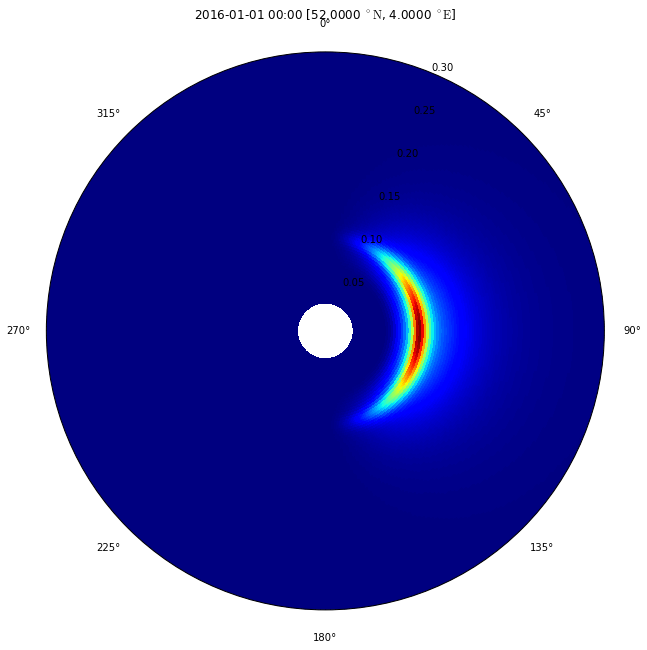

In [15]:
# use pyswan plot function
Sp2.plot('./testdata/Sp2.png') # directly to file, or to screen
%matplotlib inline 
fig=plt.figure()
fig.set_figwidth(16)
Sp2.plot()

C:\Miniconda3\envs\vows\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


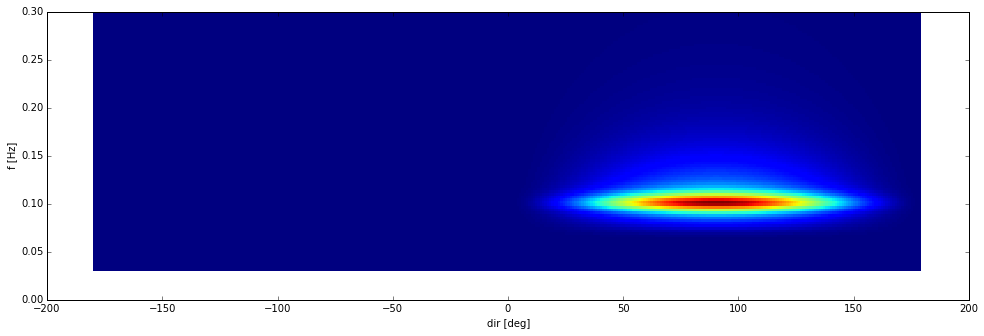

In [16]:
# Plot cartesian
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.pcolor(Sp2.direction,Sp2.f,Sp2.energy[0,0,:,:])
#plt.pcolor(Sp2.energy)
ax.set_ylabel('f [Hz]')
ax.set_xlabel('dir [deg]')

## IO example: Parametric timeseries

<Spectrum0D  shape:[nt,nx:(10,)]: "">

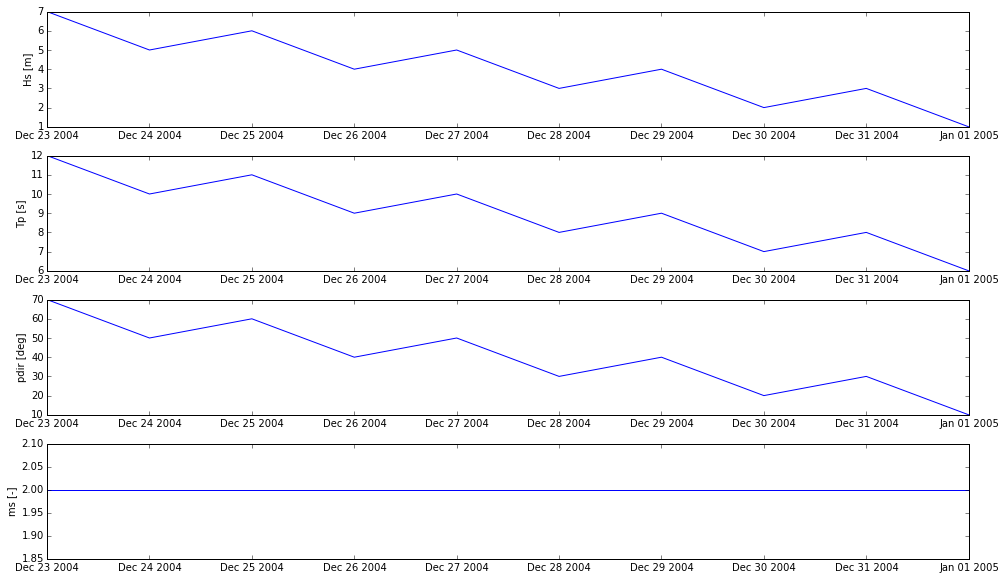

In [17]:
# Define 0D spectrum, to generate 1D and 2D spectra
Sp0t = ow.Spec0()
Sp0t.t     = [datetime.datetime(2005,1,1) - datetime.timedelta(days=x) for x in range(0, 10)]
Sp0t.Hs    = np.asarray([1., 3, 2, 4, 3, 5, 4, 6, 5, 7])
Sp0t.Tp    = Sp0t.Hs + 5
Sp0t.pdir  = Sp0t.Hs*10
Sp0t.ms    = 10*[2]
%matplotlib inline
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(8)
Sp0t.plot()
Sp0t

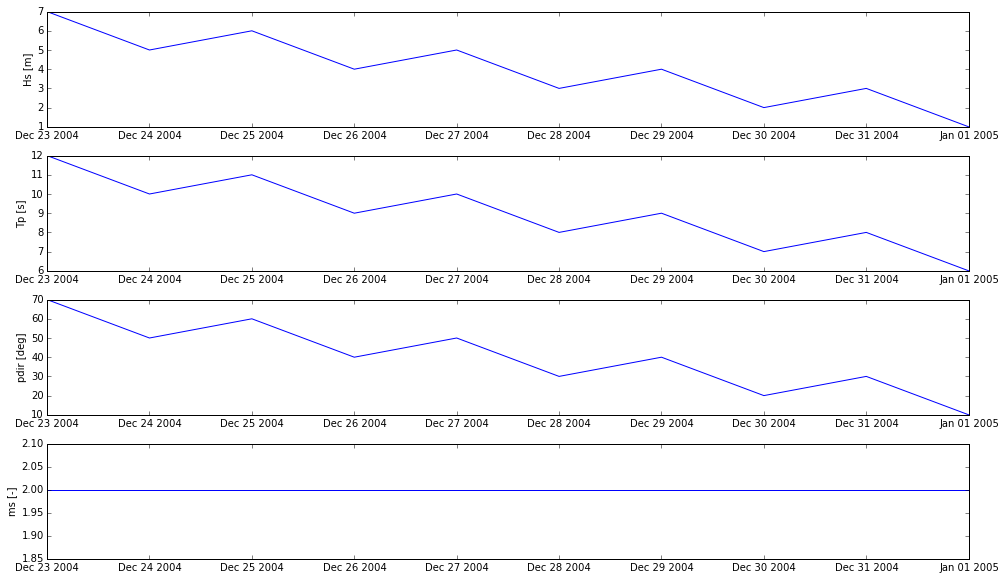

In [18]:
# save > load > plot again
with open(r'./testdata/Spec0_series.tpar','w') as f:
    swan.to_file0D(Sp0t,f)
with open(r'./testdata/Spec0_series.tpar','r') as f:
    Sp0t_copy = swan.from_file0D(f)
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(8)
Sp0t_copy.plot()    

## Initialize includes check for dimension E againts t,x,f,directions

In [19]:
T0 = ow.Spec1()
T0

<Spectrum1D  shape:[nt:1,nx:1,nf:1]: "">

In [20]:
T1 = ow.Spec1()
T1

<Spectrum1D  shape:[nt:1,nx:1,nf:1]: "">

In [21]:
f = np.linspace(0.03,.3,100)
T1 = ow.Spec1(f=f)
T1

<Spectrum1D  shape:[nt:1,nx:1,nf:100]: "">

In [22]:
T1 = ow.Spec1(f=f,energy=[[f]])
T1

<Spectrum1D  shape:[nt:1,nx:1,nf:100]: "">

In [23]:
T2 = ow.Spec2()
T2

<Spectrum2D  shape:[nt:1,nx:1,nf:1,nd:1]: "">

In [24]:
T2 = ow.Spec2(f=f,direction=dirs)
T2

<Spectrum2D  shape:[nt:1,nx:1,nf:100,nd:360]: "">

In [25]:
T2 = ow.Spec2(f=f,direction=dirs,energy=[[np.zeros((len(f),len(dirs)))]])
T2

<Spectrum2D  shape:[nt:1,nx:1,nf:100,nd:360]: "">

In [26]:
# SHOULD GO WRONG: x and t missing from dimensions
W1 = ow.Spec1(f=f,energy=f)
W1

Exception: dimensions E (100,) do not match t,x,f (1, 1, 100)

In [27]:
# SHOULD GO WRONG: x and t missing from dimensions
W2 = ow.Spec2(f=f,direction=dirs,energy=np.zeros((len(f),len(dirs))))
W2

Exception: dimensions E (100, 360) do not match t,x,f,direction (1, 1, 100, 360)

# multidimensional

<Spectrum1D  shape:[nt:2,nx:3,nf:100]: "">

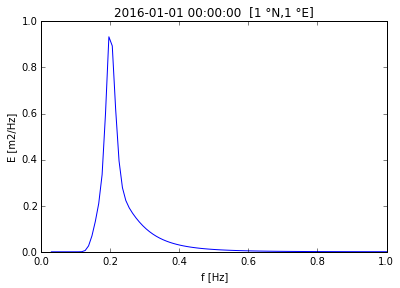

In [28]:
T1 = ow.Spec1(f=np.linspace(0.03,1,100),t=[datetime.datetime(2016,1,1),datetime.datetime(2016,1,2)],lat=[1,2,3],lon=[1,2,3])
T1.from_jonswap(1,5,-90,10)
%matplotlib inline
T1.plot()
T1

<Spectrum2D  shape:[nt:2,nx:1,nf:100,nd:138]: "">

C:\Miniconda3\envs\vows\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


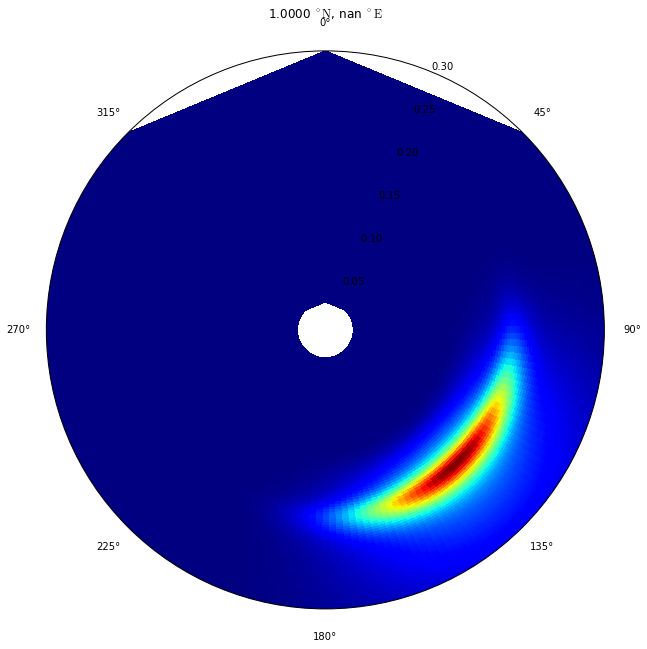

In [29]:
dirs = [0,] + list(45+np.arange(0,136)*2.) + [360,]
T2 = ow.Spec2(f=np.linspace(0.03,.3,100),t=[0,1],lat=[1,2,3],direction=dirs)
T2.from_jonswap(1,5,135,5)
%matplotlib inline
T2.plot()
T2